In [22]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


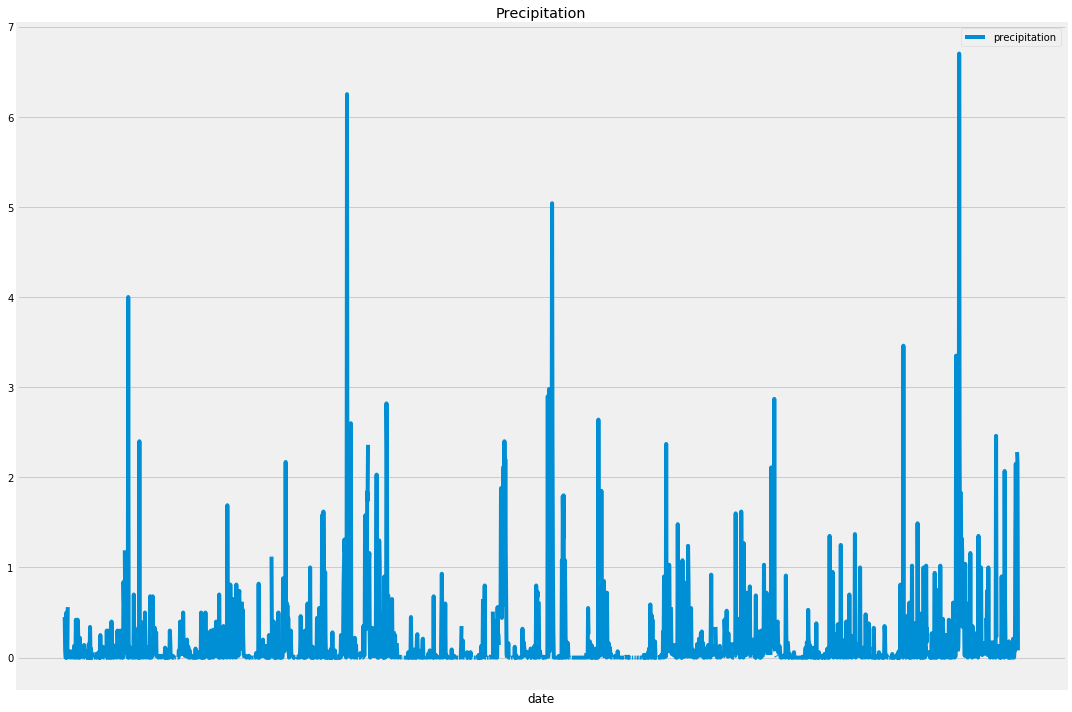

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results, # sort by date
precip = session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
# print(precip)

# put into a dataframe to prepare to plot
df = pd.DataFrame(precip, columns=['precipitation', 'date'])
df.set_index('date', inplace=True)
# df.head()

# plot
df.iloc[::-1].plot.line(title="Precipitation", figsize=(15,10))
plt.xticks([])
plt.tight_layout()
plt.show()


In [14]:
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print("Last date in query: ",last_date)

year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("One year ago : ", year_ago)

Last date in query:  ('2017-08-23',)
One year ago :  2016-08-23


In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.station).count()
print(station_count)

9


In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
    
station_count = session.query(Measurement.station.label("Station"), func.count(Measurement.station).label("Count"))

station_group = station_count.group_by(Measurement.station).order_by(func.count(Measurement.station).desc())

for station in station_group.all():
        print(station)
    

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [18]:
temp = session.query(Measurement.station.label("Station"), 
        func.min(Measurement.tobs).label("Low"),
        func.max(Measurement.tobs).label("High"),
        func.avg(Measurement.tobs).label("Average"))
qry = temp.filter(Measurement.station == ('USC00519281'))
for _res in qry.all():
    print(_res)
    
    

('USC00519281', 54.0, 85.0, 71.66378066378067)


In [19]:
    
station_filter = session.query(Measurement.station.label("Station"), func.count(Measurement.station).label("Count")).filter_by(station = "USC00519281")

station_group = station_filter.group_by(Measurement.station).order_by(func.count(Measurement.station).desc())

for station in station_group.all():
        print(station)
        

('USC00519281', 2772)


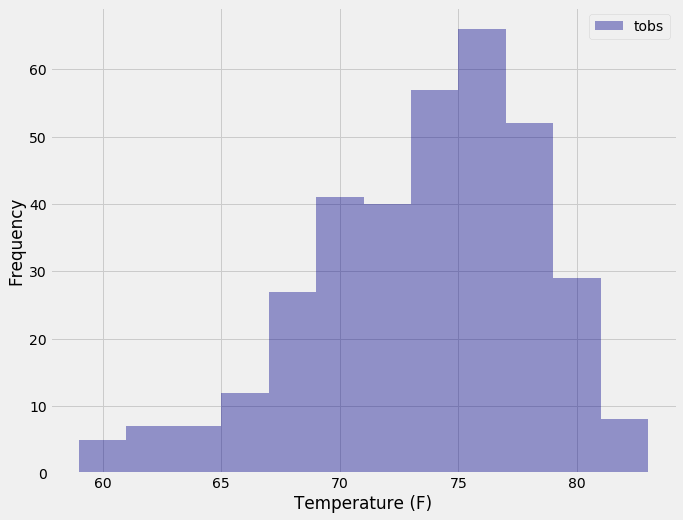

In [23]:
#filter by the station with the highest number of observations
yr_tobs = session.query(Measurement.tobs).filter(Measurement.date > year_ago).filter(Measurement.station == "USC00519281").all()

#set the plot size
plt.figure(figsize=(10,8))

#plot the results as a histogram with bins=12
yr_tobs_hist = sns.distplot(yr_tobs, bins=12, kde=False, axlabel='Temperature (F)', label='tobs', color='darkblue')

#label the y axis
yr_tobs_hist.set(ylabel='Frequency')

plt.legend()
plt.show()

In [1]:
# OPTIONAL
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
# def calc_temps(2017-07-20, 2017-07-25):
# #     """TMIN, TAVG, and TMAX for a list of dates.
    
# #     Args:
# #         start_date (string): A date string in the format %Y-%m-%d
# #         end_date (string): A date string in the format %Y-%m-%d
        
# #     Returns:
# #         TMIN, TAVE, and TMAX
# #     """
    
#     return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
#         filter(Measurement.date >= 2017-07-20).filter(Measurement.date <= 2017-07-25).all()

# # function usage example
# print(calc_temps('2017-07-20', '2017-07-25'))


In [ ]:
#Optional
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

# def daily_normals(date):
#     """Daily Normals.
    
#     Args:
#         date (str): A date string in the format '%m-%d'
        
#     Returns:
#         A list of tuples containing the daily normals, tmin, tavg, and tmax
    
#     """
    
#     sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
#     return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
# daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`


# Part 2 - Climate App